In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 180

In [5]:
df = pd.read_csv('original_dataset.csv', sep = ';')

### Introduction of roll, pitch and module parameters for each accelerometer

In [6]:
df['roll1'] = pd.Series(180/np.pi*(np.arctan2(df['y1'], df['z1'])))
df['pitch1'] = pd.Series(180/np.pi*(np.arctan2(-df['x1'], np.sqrt(np.power(df['y1'], 2) + np.power(df['z1'], 2)))))
df['module1'] = pd.Series(np.sqrt(np.power(df['x1'], 2) + np.power(df['y1'], 2) + np.power(df['z1'], 2)))

df['roll2'] = pd.Series(180/np.pi*(np.arctan2(df['y2'], df['z2'])))
df['pitch2'] = pd.Series(180/np.pi*(np.arctan2(-df['x2'], np.sqrt(np.power(df['y2'], 2) + np.power(df['z2'], 2)))))
df['module2'] = pd.Series(np.sqrt(np.power(df['x2'], 2) + np.power(df['y2'], 2) + np.power(df['z2'], 2)))

df['roll3'] = pd.Series(180/np.pi*(np.arctan2(df['y3'], df['z3'])))
df['pitch3'] = pd.Series(180/np.pi*(np.arctan2(-df['x3'], np.sqrt(np.power(df['y3'], 2) + np.power(df['z3'], 2)))))
df['module3'] = pd.Series(np.sqrt(np.power(df['x3'], 2) + np.power(df['y3'], 2) + np.power(df['z3'], 2)))

df['roll4'] = pd.Series(180/np.pi*(np.arctan2(df['y4'], df['z4'])))
df['pitch4'] = pd.Series(180/np.pi*(np.arctan2(-df['x4'], np.sqrt(np.power(df['y4'], 2) + np.power(df['z4'], 2)))))
df['module4'] = pd.Series(np.sqrt(np.power(df['x4'], 2) + np.power(df['y4'], 2) + np.power(df['z4'], 2)))

df.head(1)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,...,module1,roll2,pitch2,module2,roll3,pitch3,module3,roll4,pitch4,module4
0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,-23,...,111.543713,136.548158,41.308515,34.842503,131.496468,-2.062298,138.942434,-144.981829,39.884957,233.918789


### Remove of x, y, z parameters for each accelerometer

In [4]:
df = df.drop(labels = ['x1', 'y1', 'z1'], axis = 1)
df = df.drop(labels = ['x2', 'y2', 'z2'], axis = 1)
df = df.drop(labels = ['x3', 'y3', 'z3'], axis = 1)
df = df.drop(labels = ['x4', 'y4', 'z4'], axis = 1)

df.head(1)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,class,roll1,pitch1,module1,roll2,pitch2,module2,roll3,pitch3,module3,roll4,pitch4,module4
0,debora,Woman,46,"1,62",75,"28,6",sitting,124.402665,1.541172,111.543713,136.548158,41.308515,34.842503,131.496468,-2.062298,138.942434,-144.981829,39.884957,233.918789


In [26]:
df['mean_roll'] = pd.Series((df['roll1'] + df['roll2'] + df['roll3'] + df['roll4'])/4)
df['mean_pitch'] = pd.Series((df['pitch1'] + df['pitch2'] + df['pitch3'] + df['pitch4'])/4)
df['mean_module'] = pd.Series((df['module1'] + df['module2'] + df['module3'] + df['module4'])/4)

df.head(1)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,class,roll1,pitch1,module1,...,module2,roll3,pitch3,module3,roll4,pitch4,module4,mean_roll,mean_pitch,mean_module
0,debora,Woman,46,"1,62",75,"28,6",sitting,124.402665,1.541172,111.543713,...,34.842503,131.496468,-2.062298,138.942434,-144.981829,39.884957,233.918789,61.866365,20.168087,129.81186


In [17]:
# Given 8 row calculate mean and std for the roll, pitch and module parameters
def make_mean_variance(dataframe):
    
    new_row = {}

    for field in ['user', 'gender', 'age', 'how_tall_in_meters', 'weight', 'body_mass_index', 'class']:
        new_row[field] = dataframe[field].iloc[0]
    
    for field in ['roll1', 'pitch1', 'module1', 'roll2', 'pitch2', 'module2', \
                 'roll3', 'pitch3', 'module3', 'roll4', 'pitch4', 'module4']:
        new_row[str(f'{field}_mean')] = dataframe[field].mean()
        new_row[str(f'{field}_std')] = dataframe[field].std()
    
    return new_row

In [13]:
sitting = df.loc[df['class'] == 'sitting']
n_instance = sitting.shape[0]
avg_df = pd.DataFrame()

for i in range(int(np.ceil(n_instance/8))):
    avg_df = avg_df.append(make_mean_variance(sitting[i*8:min((i+1)*8, n_instance)]), ignore_index=True)

avg_df.head()

,age,body_mass_index,class,gender,how_tall_in_meters,module1_mean,module1_std,module2_mean,module2_std,module3_mean,...,roll1_mean,roll1_std,roll2_mean,roll2_std,roll3_mean,roll3_std,roll4_mean,roll4_std,user,weight
0,46.0,"28,6",sitting,Woman,"1,62",114.011808,2.016429,29.723556,2.805145,137.843172,...,122.735015,1.238477,128.521646,5.565034,130.752217,0.373972,-144.130846,0.391954,debora,75.0
1,46.0,"28,6",sitting,Woman,"1,62",114.572861,1.387512,28.547040,0.710347,138.005136,...,122.027535,0.678186,127.192933,4.987838,130.572779,0.357105,-144.280416,0.222359,debora,75.0
2,46.0,"28,6",sitting,Woman,"1,62",115.107202,1.174544,28.410395,0.909915,138.030471,...,122.450285,0.614537,126.277515,5.261090,130.499325,0.309619,-143.688253,1.167912,debora,75.0
3,46.0,"28,6",sitting,Woman,"1,62",116.330703,1.786440,28.357527,1.183528,137.945808,...,122.805514,0.928114,125.809016,5.251088,130.679686,0.454628,-144.358265,1.464087,debora,75.0
4,46.0,"28,6",sitting,Woman,"1,62",117.923495,1.664498,28.206754,1.002287,138.004693,...,123.318337,0.976773,127.087580,5.348714,130.572721,0.321006,-144.320362,1.666555,debora,75.0


### Mean and std on 8 subsequent rows on roll, pitch e module parameters of every accelerometer. Dataframe has been splitted by class and by user

In [6]:
avg_df = pd.DataFrame()

for classe in df['class'].unique():
    class_df = df.loc[df['class'] == classe]
    
    for user in df['user'].unique():
        class_user_df = class_df.loc[class_df['user'] == user]
        n_instance = class_user_df.shape[0]
        
        for i in range(int(np.ceil(n_instance/8))):
            avg_df = avg_df.append(make_mean_variance(class_user_df[i*8:min((i+1)*8, n_instance)]), ignore_index=True)
    
avg_df.head()

,age,body_mass_index,class,gender,how_tall_in_meters,module1_mean,module1_std,module2_mean,module2_std,module3_mean,...,roll1_mean,roll1_std,roll2_mean,roll2_std,roll3_mean,roll3_std,roll4_mean,roll4_std,user,weight
0,46.0,"28,6",sitting,Woman,"1,62",114.011808,2.016429,29.723556,2.805145,137.843172,...,122.735015,1.238477,128.521646,5.565034,130.752217,0.373972,-144.130846,0.391954,debora,75.0
1,46.0,"28,6",sitting,Woman,"1,62",114.572861,1.387512,28.547040,0.710347,138.005136,...,122.027535,0.678186,127.192933,4.987838,130.572779,0.357105,-144.280416,0.222359,debora,75.0
2,46.0,"28,6",sitting,Woman,"1,62",115.107202,1.174544,28.410395,0.909915,138.030471,...,122.450285,0.614537,126.277515,5.261090,130.499325,0.309619,-143.688253,1.167912,debora,75.0
3,46.0,"28,6",sitting,Woman,"1,62",116.330703,1.786440,28.357527,1.183528,137.945808,...,122.805514,0.928114,125.809016,5.251088,130.679686,0.454628,-144.358265,1.464087,debora,75.0
4,46.0,"28,6",sitting,Woman,"1,62",117.923495,1.664498,28.206754,1.002287,138.004693,...,123.318337,0.976773,127.087580,5.348714,130.572721,0.321006,-144.320362,1.666555,debora,75.0


In [15]:
# Write the new dataframe on file
avg_df.to_csv('measure_dataset.csv', sep = ';', index=False)

In [3]:
avg_df = pd.read_csv('measure_dataset.csv', sep = ';')

### Plot of some mean and std

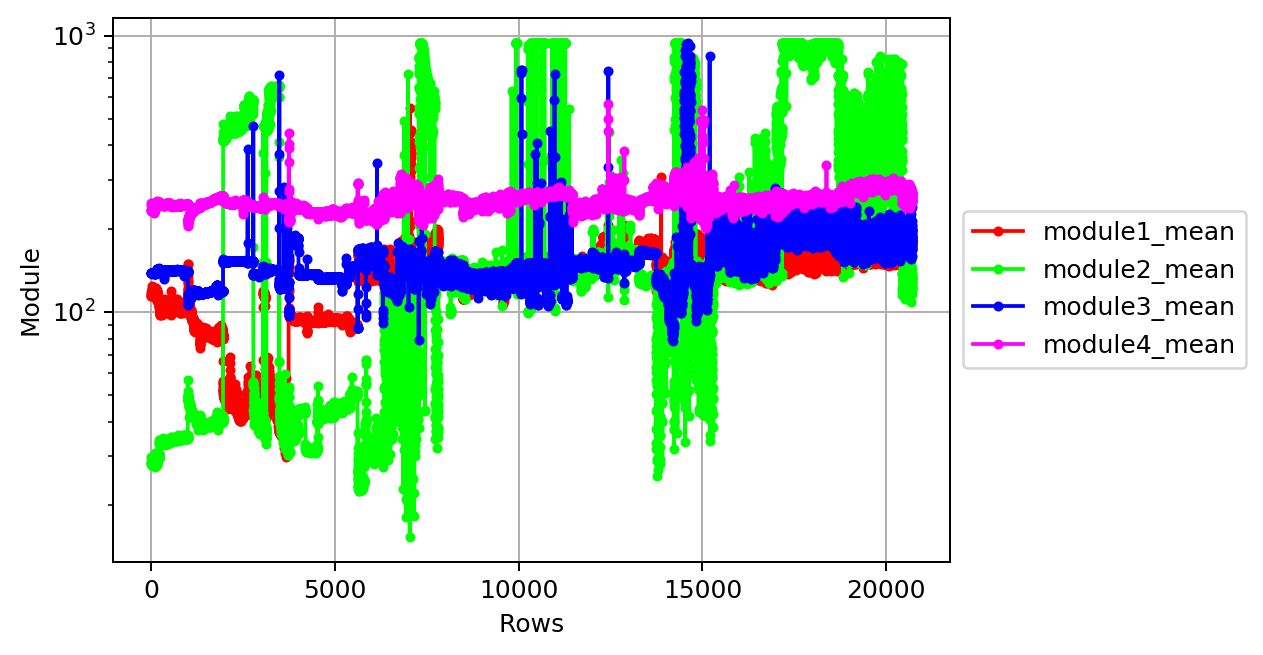

In [39]:
fields = ['module1_mean', 'module2_mean', 'module3_mean', 'module4_mean']
colors = ['#ff0000', '#00ff00', '#0000ff', '#ff00ff']
legend = []
labels = []

for k, field in enumerate(fields):
    legend.append(plt.plot(list(range(avg_df.shape[0])), list(avg_df[field]), \
                           linestyle = '-', marker = '.', color = colors[k])[0])
    labels.append(field)
 
    
plt.grid(True)
plt.yscale("log")
plt.legend(legend, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Module")
plt.xlabel("Rows")
plt.show()

### Discretization

In [306]:
n_instance = df.loc[df['class'] == 'sitting'].shape[0]
df.loc[df['class'] == 'sitting']['user'].value_counts()/n_instance*100

debora         30.840789
wallace        29.612293
katia          28.204065
jose_carlos    11.342853
Name: user, dtype: float64

In [74]:
n_instance = df.loc[df['class'] == 'standing'].shape[0]
df.loc[df['class'] == 'standing']['user'].value_counts()/n_instance*100

debora         31.538949
wallace        30.540426
katia          30.048554
jose_carlos     7.872071
Name: user, dtype: float64

In [73]:
n_instance = df.loc[df['class'] == 'walking'].shape[0]
df.loc[df['class'] == 'walking']['user'].value_counts()/n_instance*100

wallace        32.350772
debora         31.394330
katia          31.242222
jose_carlos     5.012676
Name: user, dtype: float64

In [72]:
n_instance = df.loc[df['class'] == 'standingup'].shape[0]
df.loc[df['class'] == 'standingup']['user'].value_counts()/n_instance*100

wallace        33.145389
debora         31.035038
katia          29.883206
jose_carlos     5.936367
Name: user, dtype: float64

In [71]:
n_instance = df.loc[df['class'] == 'sittingdown'].shape[0]
df.loc[df['class'] == 'sittingdown']['user'].value_counts()/n_instance*100

katia          33.964657
debora         29.990699
wallace        29.474930
jose_carlos     6.569713
Name: user, dtype: float64